In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from drizzlepac import tweakreg
from tqdm import tqdm
from collections import defaultdict
%matplotlib inline

In [2]:
import os
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in glob(os.path.join('../data/NGC4993/raw/', 'j*_flc.fits')):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/NGC4993/raw/NGC4993_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [5]:
files = {'F475W': ['../data/NGC4993/raw/NGC4993_F475W_EXP{:d}_flc.fits'.format(i) for i in range(1, 4)],
         'F850LP': ['../data/NGC4993/raw/NGC4993_F850LP_EXP{:d}_flc.fits'.format(i) for i in range(1, 3)]}
outputs = {'F475W': '../data/NGC4993/reduced/NGC4993_F475W_drc.fits',
          'F850LP': '../data/NGC4993/reduced/NGC4993_F850LP_drc.fits'}
diff_im = '../data/NGC4993/reduced/NGC4993_g-z.fits'
darks = {}

# Alignment and Drizzling

In [6]:
os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/NGC4993/calibration/'

In [13]:
# %%time
# ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F850LP', verbose=True, updatewcs=False, realign_only=False,
#                                 realign_kwargs={'threshold': 400, 'nclip': 3, 'minobj': 3, 'refimagefindcfg': {'threshold': 400}})

*****************************************************
Realign and Redrizzle relative to F850LP
--F475W: Realigning
{'conv_width': 4.0, 'threshold': 400, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'TWEAK_F850LP', 'refimage': '../data/NGC4993/reduced/NGC4993_F850LP_drc.fits', 'nclip': 3, 'minobj': 3, 'refimagefindcfg': {'threshold': 400}}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 15:15:36.538 (15/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F475W_drc.fit

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.209556876228965e-06 1.1791538020821237e-05
CD_21  CD_22: 1.1141094318176096e-05 -7.489143145025347e-06
CRVAL    : 197.43369978881032 -23.372549552297983
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049851771322515906
ORIENTAT : 122.42079833590377
WCSNAME  :  TWEAK_F850LP_1

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.258564845746586e-06 1.1454562346163226e-05
CD_21  CD_22: 1.0903266319092463e-05 -7.150331575284367e-06
CRVAL    : 197.46028612367488 -23.38797457915207
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927109617828169
ORIENTAT : 121.97382751515934
WCSNAME  :  T

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.21004224878666e-06 1.1791517997874814e-05
CD_21  CD_22: 1.1141040791661321e-05 -7.489635627313188e-06
CRVAL    : 197.43207106346682 -23.371771147372364
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049852653309285
ORIENTAT : 122.42254749567857
WCSNAME  :  TWEAK_F850LP_1

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.259043932482994e-06 1.1454546601340344e-05
CD_21  CD_22: 1.090320698733886e-05 -7.15080790592301e-06
CRVAL    : 197.45865719944757 -23.387197192273362
CRPIX    : 2048.0 1024.0
NAX

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.209646310163058e-06 1.1791198052071719e-05
CD_21  CD_22: 1.1140750544568425e-05 -7.489257173431432e-06
CRVAL    : 197.43289271040246 -23.372159305799666
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985096551600845
ORIENTAT : 122.42194077346048
WCSNAME  :  TWEAK_F850LP_1

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits['SCI',2]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.258648818292354e-06 1.1454234550208698e-05
CD_21  CD_22: 1.0902925339361657e-05 -7.150444472750897e-06
CRVAL    : 197.45947820210782 -23.38758456996937
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927029969245704
ORIENTAT : 121.97497041875293
WCSNAME  :  TWEAK_F850LP_1
--F475W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/NGC4993/reduced/NGC4993_F475W_drc.fits
{'clean': True, 'build': True, 'skysub': False, 'final_units': 'counts', 'mdriztab': False, 'combine_type': 'minmed', 'combine_nhigh': 0, 'final_kernel': 'lanczos3', 'final_rot': None, 'final_wcs': True, 'final_refimage': '../data/NGC4993/reduced/NGC4993_F850LP_drc.fits'}
Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 2.2.6 (2018-11-02 15:37:13 -0400) started at: 15:15:54.22 (15/03/2019)

==== Processing Step  Initialization  started at  15:15:54.230 (15/03

In [15]:
# tweakreg.TweakReg([outputs['F475W'], outputs['F850LP']], conv_width=4.0, minobj=3,
#                       threshold=400, nclip=3, shiftfile=False, writecat=False, clean=True,
#                       interactive=False)

In [17]:
# # Create difference image to check alignment
# f1 = fits.open(outputs['F850LP'])
# f2 = fits.open(outputs['F475W'])
# data = f2['SCI'].data / f1['SCI'].data
# hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
# hdulist.writeto(diff_im, overwrite=True)

# Automatic Source Extraction

In [18]:
%%time
box = 8
ppy.data.sources.estimate_background(outputs['F850LP'], bkg_kwargs={'bw':box, 'bh':box})

CPU times: user 5min 37s, sys: 7.09 s, total: 5min 44s
Wall time: 6min 27s


In [19]:
%%time
ppy.data.sources.mask_sources_auto(outputs['F850LP'], threshold=10.0)

CPU times: user 4.6 s, sys: 7.23 s, total: 11.8 s
Wall time: 19.5 s


# Manual Source Extraction

In [6]:
ppy.data.sources.mask_sources_manual(outputs['F850LP'], '../data/NGC4993/masks/NGC4993_F850LP.reg')

In [7]:
# compute regions using only source masks
ppy.data.sources._add_masked(outputs['F850LP'], mask_flags=[ppy.data.utils.ALL_FLAGS['SEXTRACTOR'],
                                                            ppy.data.utils.ALL_FLAGS['MANUAL']])

# Combine Masks

In [8]:
ppy.data.utils.combine_flags(outputs)

# Compute Regions

In [12]:
ppy.data.extraction.add_regions(outputs, '../data/NGC4993/masks/NGC4993_F850LP_contours_new.reg', base_filter='F850LP',
                                xc=2827, yc=2659)

100%|██████████| 45/45 [01:15<00:00,  1.68s/it]


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

# Extract PCMDs

In [13]:
pcmds = ppy.data.extraction.save_pcmds(outputs, 'F850LP', 'F475W', path='../data/NGC4993/pcmds/',
                                       name_append='NGC4993_z_gz')

Filter: F850LP
Observation Date: 57992 (MJD)
Vega ZeroPoint: 24.3316
AB ZeroPoint: 24.8573
ST ZeroPoint: 25.9444
Exposure Time: 680.0
A pre-made filter is available
Filter: F475W
Observation Date: 57992 (MJD)
Vega ZeroPoint: 26.1477
AB ZeroPoint: 26.0552
ST ZeroPoint: 25.7448
Exposure Time: 1395.0
A pre-made filter is available


100%|██████████| 180/180 [00:16<00:00, 10.63it/s]


# Check

In [14]:
f = ppy.instrument.default_ngc4993_filters()

In [15]:
with fits.open(outputs['F850LP']) as h:
    mags = f[0].counts_to_mag(h['SCI'].data)
    regions = h['REGIONS'].data
with fits.open(outputs['F475W']) as h:
    colors = f[1].counts_to_mag(h['SCI'].data) - mags

In [16]:
ellips = {}
xc, yc = 2827, 2659
delta_mags = []
for i in tqdm(range(regions.max() // 4), desc='NGC4993'):
    mask = (regions >= 4*i + 1)&(regions < 4*(i+1) + 1)
    ellips[i+1] = ppy.data.extraction.EllipticalFit(mask, xc=xc, yc=yc)
    delta_mags.append(ellips[i+1].delta_val(mags))

NGC4993: 100%|██████████| 45/45 [03:02<00:00,  4.05s/it]


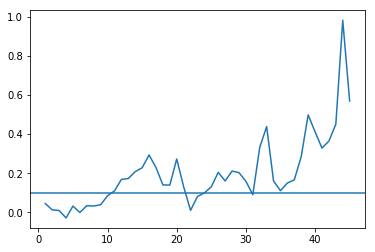

In [17]:
plt.plot(np.arange(len(delta_mags))+1, delta_mags)
plt.axhline(y=0.1)

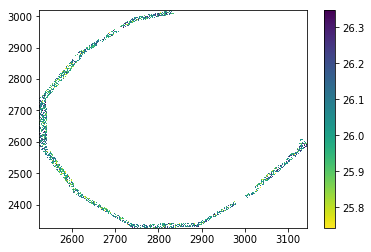

In [18]:
ppy.data.extraction.plot_image(mags, ellips[11].mask)

(25.6, 26.0)

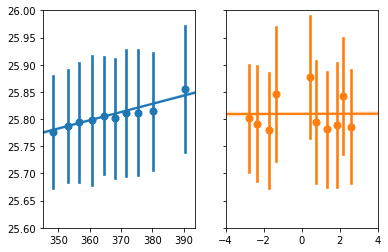

In [24]:
fig, axes = plt.subplots(ncols=2, sharey=True)
ellips[11].plot_radial_gradient(mags, ax=axes[0])
ellips[11].plot_angular_gradient(mags, ax=axes[1])
axes[1].set_xlim([-4 ,4])
axes[1].set_ylim([25.6, 26.0])

In [34]:
pcmds = {}
for i in tqdm(range(1, 180)):
    filename = f'../data/NGC4993/pcmds/NGC4993_z_gz_{i}.pcmd'
    try:
        pcmds[i] = np.loadtxt(filename, unpack=True)
    except OSError:
        continue
    if len(pcmds[i]) == 0:
        pcmds.pop(i)
        os.remove(filename)

100%|██████████| 179/179 [00:01<00:00, 98.04it/s]


In [35]:
keys = np.array(list(pcmds.keys()))

In [36]:
keys

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179])

In [37]:
Neffs = {i: np.sqrt(pcmds[i].shape[1]) for i in pcmds.keys()}

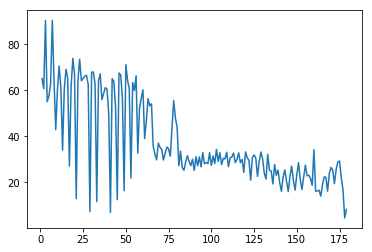

In [38]:
plt.plot(Neffs.keys(), Neffs.values())

In [39]:
f = ppy.instrument.default_ngc4993_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)

In [40]:
dmod = 33.0

In [41]:
ppy.distancemodels.dmod_to_mpc(dmod)

39.810717055349734

In [42]:
driv = ppy.driver.Driver(iso_model, gpu=False)

In [43]:
gal_3 = ppy.galaxy.SSPSimple(np.array([0., -2., 3., 10.]), dmod=dmod)
gal_4 = ppy.galaxy.SSPSimple(np.array([0., -2., 4., 10.]), dmod=dmod)
gal_5 = ppy.galaxy.SSPSimple(np.array([0., -2., 5., 10.]), dmod=dmod)
gal_6 = ppy.galaxy.SSPSimple(np.array([0., -2., 6., 10.]), dmod=dmod)

In [44]:
sky = [58.5, 157.1]

In [45]:
pcmd_3, _ = driv.simulate(gal_3, 256, sky_noise=sky)
pcmd_4, _ = driv.simulate(gal_4, 256, sky_noise=sky)
pcmd_5, _ = driv.simulate(gal_5, 256, sky_noise=sky)
pcmd_6, _ = driv.simulate(gal_6, 256, sky_noise=sky)

In [46]:
is_dark = False
for i in tqdm(np.unique((keys-1)//4)):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharex=True, sharey=True)
    axes = [axes[0,1], axes[0,0], axes[1,0], axes[1,1]] # 4 quadrants
    for j in range(4):
        k = j + 1 + 4*i
        if k not in pcmds:
            continue
        pcmd = pcmds[k]
        ppy.plotting.plot_pcmd(pcmd, ax=axes[j])
        ppy.plotting.plot_pcmd_contours(pcmd_3, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_4, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_5, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_6, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        axes[j].set_title('Region {:d}, Neff = {:.0f}'.format(k, np.sqrt(pcmd.shape[1])))
        ppy.plotting.plot_isochrone(iso_model, dmod=30.25, axes=axes[j], mag_system='vega')
        axes[j].axhline(y=f[0].counts_to_mag(sky[0]), color='r', ls='--')
    axes[0].set_xlim([0, 3])
    axes[0].set_ylim([29, 22])
    plt.tight_layout()
    plt.savefig(f'figures/NGC4993/NGC4993_s{i}_pcmds.pdf')
    plt.close()

100%|██████████| 45/45 [00:51<00:00,  1.15s/it]
